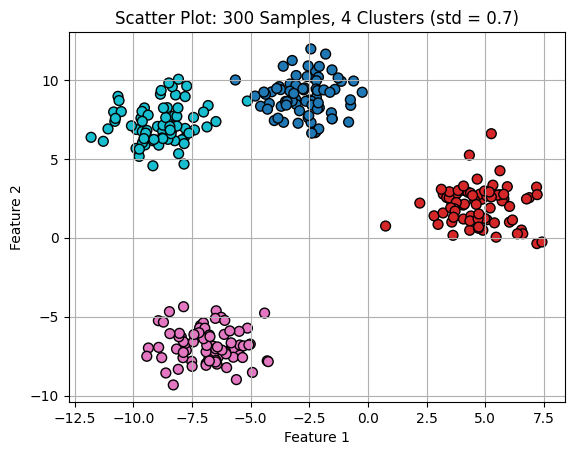

In [ ]:
# น้ำเข้าข้อมูล pandas / matplotlib.pyplot และ plt
# จาก form sklearn.datasets และนำเข้าข้อมูล make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# สร้างข้อมลจำลอง กำหนดจุด x คือข้อมูลของ 300 จุด y เป็นป่ายประกาศว่าจุดอยู่ที่กลุ่มไหน
# อย่างแรกกำหนดจุด 300 และแบ่งกลุ่มมาอีก 4 กำหนดค่าส่วนเบี่ยงเบนมาตรฐาน และใช้คำสั่งทำซ้ำ
x, y = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)


# สร้างกราฟ กำหนดแกน xเป็น0 yเป็น1 กำหนดสีให้ต่างกัน กำหนดขนาด กำหนดขอบ
# 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='tab10', s=50, edgecolor='k')
plt.title('Scatter Plot: 300 Samples, 4 Clusters (std = 0.7)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



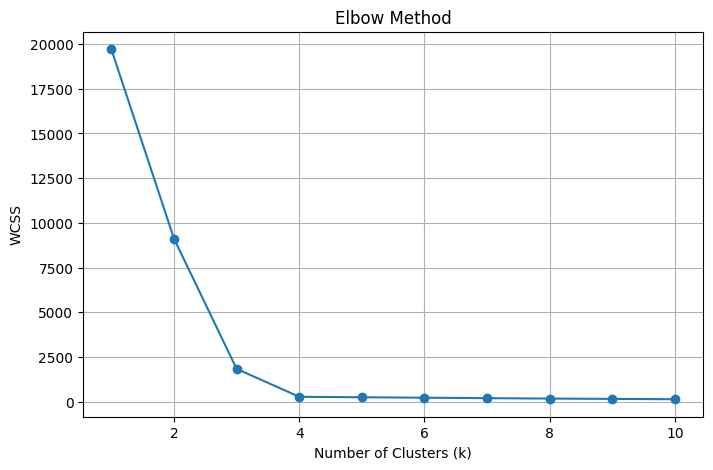

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# สร้างข้อมูลจำลอง
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# คำนวณ WCSS (Within-Cluster Sum of Squares)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)

# วาดกราฟ Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


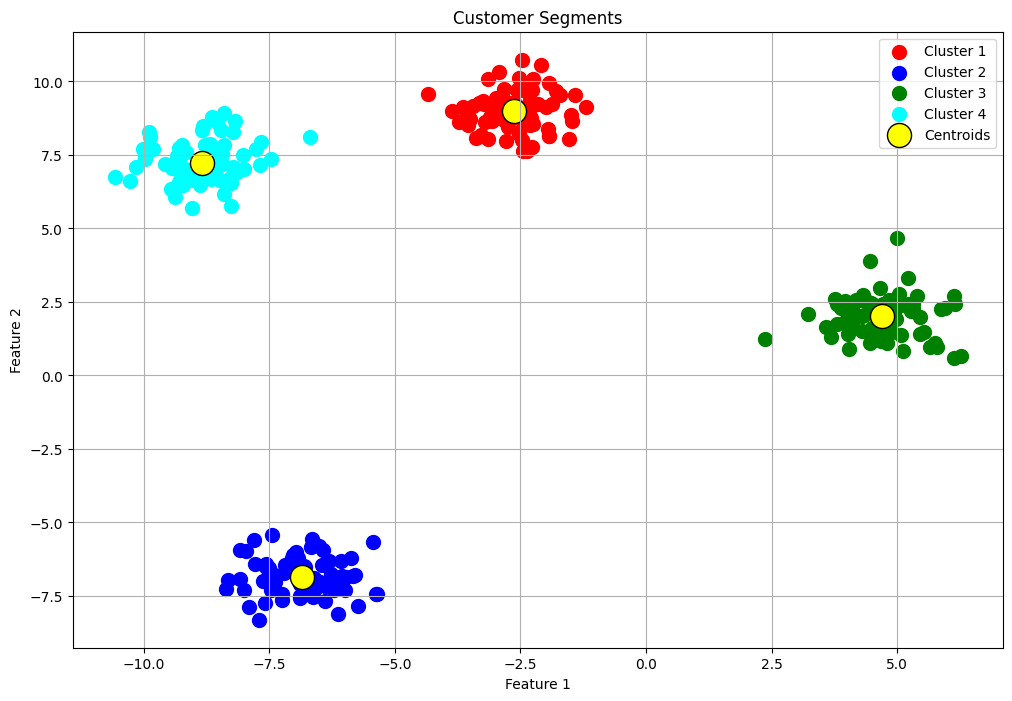

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# สร้างข้อมูลจำลอง
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# กำหนดจำนวนคลัสเตอร์ที่เหมาะสม (จาก Elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# สร้างโมเดลและคาดการณ์คลัสเตอร์
y_kmeans = kmeans.fit_predict(X)

# พล็อตผลลัพธ์การจัดกลุ่ม
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

# พล็อตจุดศูนย์กลางคลัสเตอร์
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', edgecolors='black', label='Centroids')

plt.title("Customer Segments")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
